In [1]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
data = pd.read_csv("./assignment_basket.csv")
data = data.dropna()
data.head(20)

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend
5,3,Cookies,30-10-2016 10:07,morning,weekend
6,4,Muffin,30-10-2016 10:08,morning,weekend
7,5,Coffee,30-10-2016 10:13,morning,weekend
8,5,Pastry,30-10-2016 10:13,morning,weekend
9,5,Bread,30-10-2016 10:13,morning,weekend


In [3]:
data.columns

Index(['Transaction', 'Item', 'date_time', 'period_day', 'weekday_weekend'], dtype='object')

In [4]:
data.Item.unique()

array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'Tartine',
       'Basket', 'Mineral water', 'Farm House', 'Fudge', 'Juice',
       "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pintxos', 

In [5]:

# Transactions done in France
basket_weekday = (data[data['weekday_weekend'] =="weekday"]
            .groupby(['Transaction', 'period_day'])['Item']
            .sum().unstack().reset_index().fillna(0)
            .set_index('Transaction'))

# Transactions done in France
basket_weekend = (data[data['weekday_weekend'] =="weekend"]
            .groupby(['Transaction', 'period_day'])['Item']
            .sum().unstack().reset_index().fillna(0)
            .set_index('Transaction'))
basket_weekday

period_day,afternoon,evening,morning,night
Transaction,,,,
81,0,0,CoffeeCake,0
82,0,0,TartineBread,0
83,0,0,CoffeeBread,0
84,0,0,Bread,0
85,0,0,CoffeeCoffeePastryMedialuna,0
...,...,...,...,...
9546,CoffeeScone,0,0,0
9547,Coke,0,0,0
9548,CoffeeCoffeeAlfajores,0,0,0


In [6]:
def hot_encode(x):
    print(type(x), x)
    if(x<= 0):
        return 0
    if(x>= 1):
        return 1

In [7]:
# Encoding the datasets
basket_encoded = pd.get_dummies(basket_weekend)
# basket_encoded = basket_weekday.applymap(hot_encode)
basket_weekday = basket_encoded


# basket_encoded = basket_weekend.applymap(hot_encode)
basket_encoded = pd.get_dummies(basket_weekend)
basket_weekend = basket_encoded

In [8]:
basket_weekday

,afternoon_0,afternoon_Afternoon with the baker,afternoon_Alfajores,afternoon_AlfajoresAlfajores,afternoon_AlfajoresAlfajoresCoffee,afternoon_AlfajoresAlfajoresCoffeeCoffeeCoffee,afternoon_AlfajoresAlfajoresTea,afternoon_AlfajoresBread,afternoon_AlfajoresBreadMy-5 Fruit ShootJuice,afternoon_AlfajoresBreadTea,...,morning_Truffles,morning_TrufflesBreadCoffee,morning_TrufflesCoffeeThe Nomad,morning_Vegan mincepie,morning_Vegan mincepieCake,morning_Vegan mincepieCakeCoffeeCoffeeCoffee,night_0,night_Hot chocolateHot chocolate,night_Scandinavian,night_Vegan Feast
Transaction,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9682,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [9]:
# Building the model
frq_items = apriori(basket_weekday, min_support = 0.03, use_colnames = True)

# Collecting the inferred rules in a dataframe
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules.head()

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
107,(morning_Bread),"(evening_0, night_0, afternoon_0)",0.064157,0.438253,0.064157,1.0,2.281787,0.036040,inf
123,(morning_Coffee),"(evening_0, night_0, afternoon_0)",0.042169,0.438253,0.042169,1.0,2.281787,0.023688,inf
28,(morning_Bread),"(evening_0, afternoon_0)",0.064157,0.440964,0.064157,1.0,2.267760,0.035866,inf
35,(morning_Coffee),"(evening_0, afternoon_0)",0.042169,0.440964,0.042169,1.0,2.267760,0.023574,inf
103,"(morning_Bread, night_0)","(evening_0, afternoon_0)",0.064157,0.440964,0.064157,1.0,2.267760,0.035866,inf


In [10]:
frq_items.head()

,support,itemsets
0,0.468675,(afternoon_0)
1,0.053614,(afternoon_Bread)
2,0.036747,(afternoon_Coffee)
3,0.972289,(evening_0)
4,0.561747,(morning_0)


In [11]:
frq_items = apriori(basket_weekend, min_support = 0.03, use_colnames = True)

# Collecting the inferred rules in a dataframe
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules.head()

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
107,(morning_Bread),"(evening_0, night_0, afternoon_0)",0.064157,0.438253,0.064157,1.0,2.281787,0.036040,inf
123,(morning_Coffee),"(evening_0, night_0, afternoon_0)",0.042169,0.438253,0.042169,1.0,2.281787,0.023688,inf
28,(morning_Bread),"(evening_0, afternoon_0)",0.064157,0.440964,0.064157,1.0,2.267760,0.035866,inf
35,(morning_Coffee),"(evening_0, afternoon_0)",0.042169,0.440964,0.042169,1.0,2.267760,0.023574,inf
103,"(morning_Bread, night_0)","(evening_0, afternoon_0)",0.064157,0.440964,0.064157,1.0,2.267760,0.035866,inf


NameError: name 'plt' is not defined

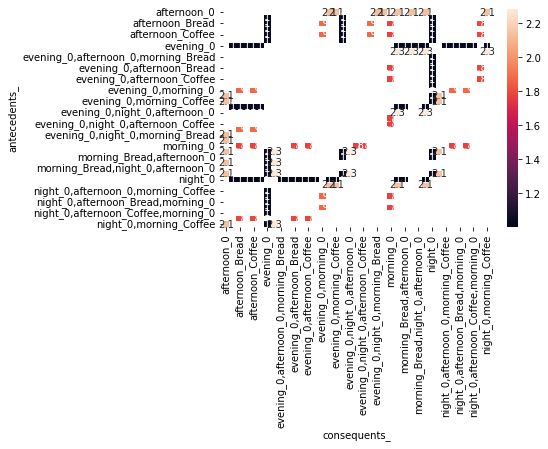

In [12]:
# Replace frozen sets with strings

rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

pivot = rules.pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')

sns.heatmap(pivot, annot = True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()